In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [22]:
# Step 1. Ambil data dari API
API_KEY = "db6add528a6d6d7d48707b1420df8e1a"  
url = "http://api.exchangeratesapi.io/v1/latest?access_key=db6add528a6d6d7d48707b1420df8e1a"

response = requests.get(url)
data = response.json()

In [23]:
# Step 2. Transformasi data JSON menjadi DataFrame
rates = data["rates"]
df = pd.DataFrame(list(rates.items()), columns=["currency", "rate"])
df["base"] = data["base"]
df["date"] = data["date"]

print(df)

    currency          rate base        date
0        AED      4.227659  EUR  2025-11-06
1        AFN     75.977117  EUR  2025-11-06
2        ALL     96.579339  EUR  2025-11-06
3        AMD    440.401422  EUR  2025-11-06
4        ANG      2.060565  EUR  2025-11-06
..       ...           ...  ...         ...
167      YER    274.549659  EUR  2025-11-06
168      ZAR     20.020318  EUR  2025-11-06
169      ZMK  10361.868477  EUR  2025-11-06
170      ZMW     25.777904  EUR  2025-11-06
171      ZWL    370.674746  EUR  2025-11-06

[172 rows x 4 columns]


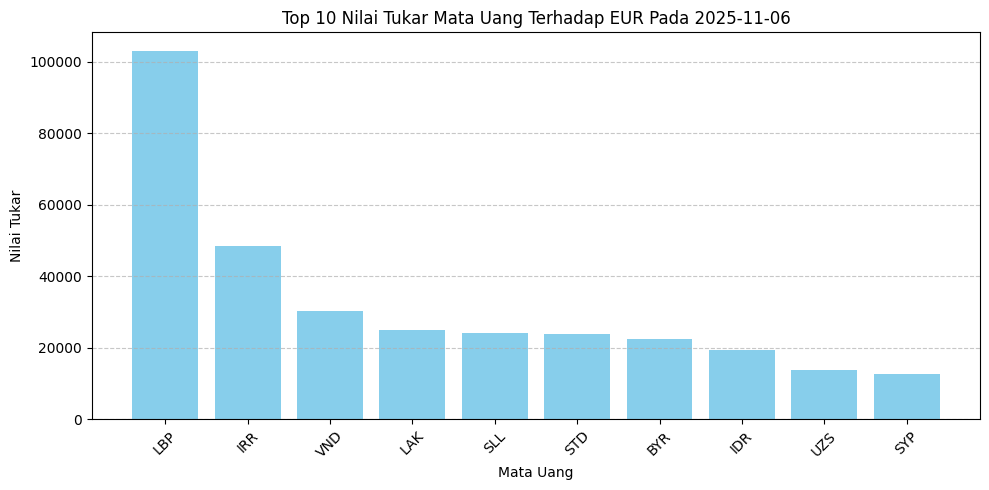

In [27]:
# Step 3. Visualisasi 10 mata uang teratas berdasarkan nilai tukar terhadap EUR 
top10 = df.sort_values("rate", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10["currency"], top10["rate"], color="skyblue")
plt.title(f"Top 10 Nilai Tukar Mata Uang Terhadap {data['base']} Pada {data['date']}")
plt.xlabel("Mata Uang")
plt.ylabel("Nilai Tukar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("exchange_rate_chart.png")
plt.show()

In [28]:
# Step 4. Simpan ke CSV
df.to_csv(f"exchange_rates_{date.today()}.csv", index=False)
print("Data dan grafik berhasil disimpan.")

Data dan grafik berhasil disimpan.
